In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Customer_Churn_ANN_Tuning/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.isnull().sum()   ## no null data

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


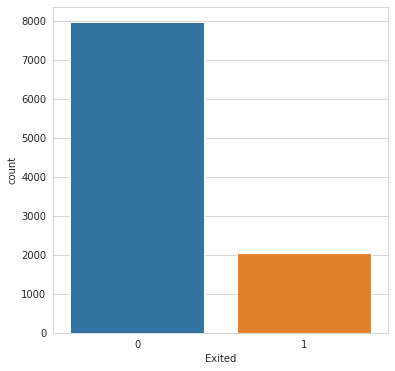

In [ ]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


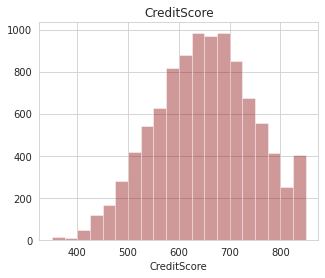

In [ ]:
plt.figure(figsize=(5,4))
sns.set_style('whitegrid')
sns.distplot(data['CreditScore'].dropna(),kde=False,color='darkred',bins=20)
plt.title('CreditScore')
plt.show()

In [5]:
train_df=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


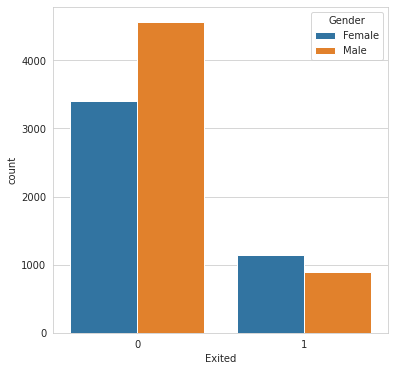

In [ ]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=data,hue='Gender')
plt.show()

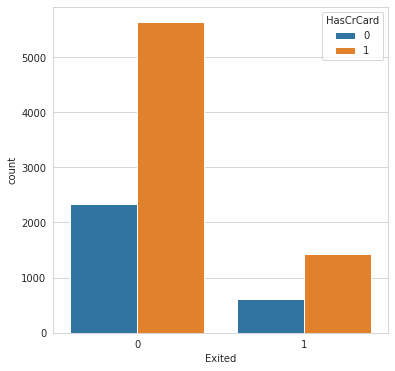

In [ ]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=data,hue='HasCrCard')
plt.show()

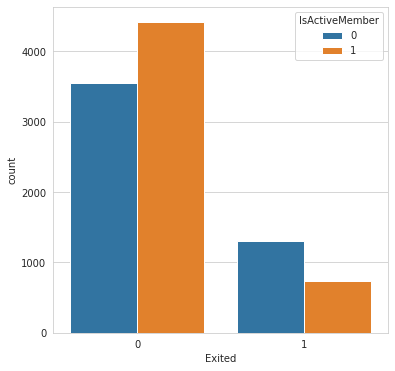

In [ ]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=data,hue='IsActiveMember')
plt.show()

In [ ]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
gender_grp_df=train_df.groupby(['IsActiveMember','Gender']).agg('count')
gender_grp_df.reset_index(inplace=True)

In [ ]:
gender_grp_df

,IsActiveMember,Gender,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,0,Female,2259,2259,2259,2259,2259,2259,2259,2259,2259
1,0,Male,2590,2590,2590,2590,2590,2590,2590,2590,2590
2,1,Female,2284,2284,2284,2284,2284,2284,2284,2284,2284
3,1,Male,2867,2867,2867,2867,2867,2867,2867,2867,2867


Text(0, 0.5, 'Counts')

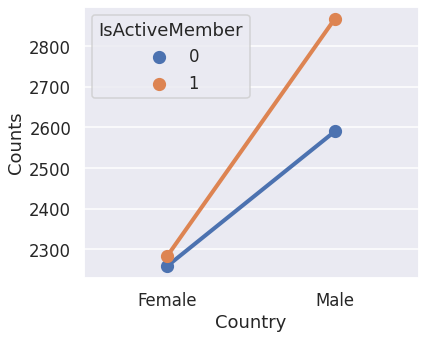

In [ ]:
#Plotting the 'Exited' and 'gender' :
plt.figure(figsize=(6,5))
sns.set(style = 'darkgrid')
sns.set_context("talk")
sns.pointplot(data=gender_grp_df,x='Gender',y='Exited',hue='IsActiveMember')
plt.xlabel('Country')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

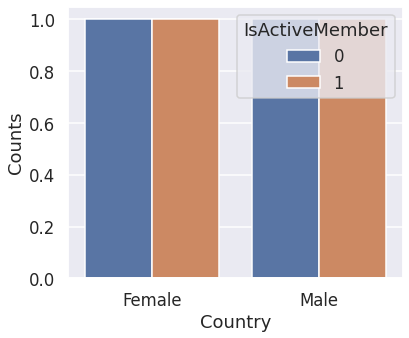

In [ ]:
#Plotting the 'Exited' and 'gender' :
plt.figure(figsize=(6,5))
sns.set(style = 'darkgrid')
sns.set_context("talk")
sns.countplot(x='Gender',data=gender_grp_df,hue='IsActiveMember')
plt.xlabel('Country')
plt.ylabel('Counts')

***Feature Engineering***

In [6]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
## Preprocess mumeric variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
features = ["Age", "CreditScore", "Tenure", "Balance",'NumOfProducts','EstimatedSalary']
train_df[features]=scaler.fit_transform(train_df[features])

In [9]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1
3,0.501521,France,Female,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0


In [10]:
## Preprocess categorical variables
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
#oe_results = oe_style.fit_transform(obj_df[["body_style"]])

In [11]:
categorical_cols = ["Geography", "Gender"]
#array_hot_encoded = oe_style.fit_transform(train_df[categorical_cols])
train_final = pd.get_dummies(train_df, columns = categorical_cols)

In [12]:
train_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0


In [13]:
X = train_final.drop(['Exited'],axis=1)
y = train_final.Exited

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**With keras tuner**

In [ ]:
!pip install keras-tuner

In [20]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
from tensorflow import keras as tfk
import kerastuner as kt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [27]:
def build_model(hp):
  classifier = Sequential()

  # Choose an optimal value between 32-512
  hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
  hp_units2=hp.Int('units2',min_value=32,max_value=512,step=32)
  classifier.add(Dense(units = hp_units1, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
  classifier.add(Dense(units = hp_units2, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units=1,activation='sigmoid'))  

  # Tune the learning rate for the optimizer
  hp_learning_rt=hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])

  classifier.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rt), metrics=['accuracy'])

  #x=tf.keras.layers.Activation('relu')(x)
  return classifier

In [28]:
# HyperBand algorithm from keras tuner
tuner=kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=5,
    directory='keras_tuner_dir',
    project_name='keras_tuner_demo'
)

In [29]:
# see a summary of the model by using the search_space_summary() method.
tuner.search_space_summary()

Search space summary
Default search space size: 3
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [30]:
tuner.search(X_train, y_train, epochs=10, batch_size=100,validation_split=0.3)

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.8495833277702332

Best val_accuracy So Far: 0.8508333563804626
Total elapsed time: 00h 00m 26s


In [ ]:
tuner.results_summary()

In [33]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps

In [34]:
## Build the model with the optimal hyperparameters and train it on the data for 10 epochs

tuned_model=tuner.hypermodel.build(best_hps)
history=tuned_model.fit(X_train, y_train, epochs=10, batch_size=100,validation_split=0.3)

Epoch 1/10
56/56 [==============================] - 1s 8ms/step - loss: 0.4707 - accuracy: 0.7975 - val_loss: 0.4348 - val_accuracy: 0.8071
Epoch 2/10
56/56 [==============================] - 0s 6ms/step - loss: 0.4077 - accuracy: 0.8223 - val_loss: 0.4005 - val_accuracy: 0.8300
Epoch 3/10
56/56 [==============================] - 0s 5ms/step - loss: 0.3617 - accuracy: 0.8529 - val_loss: 0.3741 - val_accuracy: 0.8404
Epoch 4/10
56/56 [==============================] - 0s 6ms/step - loss: 0.3465 - accuracy: 0.8587 - val_loss: 0.3693 - val_accuracy: 0.8492
Epoch 5/10
56/56 [==============================] - 0s 6ms/step - loss: 0.3427 - accuracy: 0.8582 - val_loss: 0.3672 - val_accuracy: 0.8458
Epoch 6/10
56/56 [==============================] - 0s 6ms/step - loss: 0.3322 - accuracy: 0.8600 - val_loss: 0.3616 - val_accuracy: 0.8504
Epoch 7/10
56/56 [==============================] - 0s 6ms/step - loss: 0.3285 - accuracy: 0.8641 - val_loss: 0.3607 - val_accuracy: 0.8462
Epoch 8/10
56/56 [==

In [37]:
## Evaluate the test performance of the tuned model
scores=tuned_model.evaluate(X_test,y_test,verbose=0)
scores
print("Accuracy: %.2f%%" % (scores[1]*100))

[0.33905014395713806, 0.8565000295639038]

In [41]:
tuned_model.predict_classes(np.array(X_test.head(1)))

AttributeError: ignored

In [46]:
X_test.iloc[0:1,1:3]
array_test=np.array(X_test.iloc[0:1])
array_test

array([[-0.55385049, -0.37395771,  1.03290776,  0.87532296, -0.91158349,
         1.        ,  1.        ,  1.61304597,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ]])

**Without Keras tuner**

In [17]:
model=build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=100,validation_split=0.3)

Epoch 1/10
56/56 [==============================] - 1s 6ms/step - loss: 0.6630 - accuracy: 0.6888 - val_loss: 0.6220 - val_accuracy: 0.7958
Epoch 2/10
56/56 [==============================] - 0s 4ms/step - loss: 0.5854 - accuracy: 0.7961 - val_loss: 0.5531 - val_accuracy: 0.7958
Epoch 3/10
56/56 [==============================] - 0s 4ms/step - loss: 0.5230 - accuracy: 0.7961 - val_loss: 0.5024 - val_accuracy: 0.7962
Epoch 4/10
56/56 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7962 - val_loss: 0.4719 - val_accuracy: 0.7967
Epoch 5/10
56/56 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.7984 - val_loss: 0.4530 - val_accuracy: 0.7971
Epoch 6/10
56/56 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.8002 - val_loss: 0.4403 - val_accuracy: 0.8021
Epoch 7/10
56/56 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.8064 - val_loss: 0.4302 - val_accuracy: 0.8071
Epoch 8/10
56/56 [==

In [50]:
model.predict(array_test)

array([[0.48672673]], dtype=float32)

In [53]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64